In [0]:
!pip install tensorflow==1.5.0

In [0]:
import tensorflow as tf
tf.__version__

'1.5.0'

Softmax 활용한 Mnist 분석


In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
import tensorflow as tf 
#import numpy as np
train_img, train_lbl = mnist.train.next_batch(mnist.train.num_examples)
print(train_img.shape, train_lbl.shape)
test_img, test_lbl = mnist.test.next_batch(mnist.test.num_examples)
print(test_img.shape, test_lbl.shape)
X = tf.placeholder(tf.float32, shape=[None,784])
Y = tf.placeholder(tf.float32, shape=[None,10])
W = tf.Variable(tf.random_normal([784,10]))
b = tf.Variable(tf.random_normal([10]))
# model, cost, train
model_LC = tf.matmul(X,W)+b
model = tf.nn.softmax(model_LC)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model_LC, labels=Y))  #reduce_mean은 원소합의 평균
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1)), tf.float32))  ## 같으면 1(True)

## Session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #Training
    for step in range(10000):
        c, _ = sess.run([cost, train], feed_dict={X: train_img, Y: train_lbl})
        if step % 100 == 0:
            print(step, c)
    # Testing
    print(sess.run(acc, feed_dict={X: test_img, Y: test_lbl}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 784) (55000, 10)
(10000, 784) (10000, 10)
0 13.697787
100 9.962414
200 8.174694
300 6.9923916
400 6.1236176
500 5.4570465
600 4.9268374
700 4.496617
800 4.143324
900 3.849638
1000 3.6022608
1100 3.391279
1200 3.2092574
1300 3.0505898
1400 2.9110227
1500 2.787272
1600 2.676735
1700 2.5773506
1800 2.4874496
1900 2.4056926
2000 2.3309736
2100 2.2623813
2200 2.1991494
2300 2.1406598
2400 2.086366
2500 2.0358136
2600 1.9886185
2700 1.9444361
2800 1.9029878
2900 1.8640105
3000 1.8272849
3100 1.7926128
3200 1.7598269
3300 1.7287682
3400 1.699301
3500 1.6713048
3600 1.6446699
3700 1.619299
3800 1.5951049
3900 1.5719992
4000 1.5499166
4100 1.5287852
4200 1.5085471
4300 1.4891449
4400 1.470528
4500 1.4526469
4600 1.4354577
4700 1.4189193
4800 1.4029975
4900 1.3876545
5000 1.3728565
5100 1.3585767


In [0]:
# 횟수를 늘리더라도 행렬을 줄이는게 좋다 (배치 사용)

## SoftMax, MNIST, batch로 데이터를 나눠서 가져오기 ##



In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
import tensorflow as tf
import numpy as np
import time
# test데이터는 10000개
#train_img, train_lbl = mnist.train.next_batch(mnist.train.num_examples)
#print(train_img.shape, train_lbl.shape)
#test_img, test_lbl = mnist.test.next_batch(mnist.test.num_examples)  (=mnist.test.images)
#print(test_img.shape, test_lbl.shape)
X = tf.placeholder(tf.float32, shape=[None,784])
Y = tf.placeholder(tf.float32, shape=[None,10])
W = tf.Variable(tf.random_normal([784,10]))
b = tf.Variable(tf.random_normal([10]))
batch_size = 128  # 데이터 55000개, 100*5000개가 55000보다 많더라도 앞으로 돌아가면서 다시 수행, 조건은 충분히 cost가 의미있게 낮아지면 다시 쓰는게 의미가 있음, 종류의 데이터 분포가 좋아야함. 데이터가 많아야한다. 바이어스?
num_steps = 5000  #train 데이터를 10번 돌리게됨
# model, cost, train
model_LC = tf.matmul(X,W)+b
model = tf.nn.softmax(model_LC)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model_LC, labels=Y))  #reduce_mean은 원소합의 평균
#train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
train = tf.train.AdamOptimizer(0.01).minimize(cost)   # cost가 안좋아서 ADAM 옵티마이저로 변경

acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1)), tf.float32))  ## 같으면 1(True)

## Session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #Training
    t1 = time.time()
    for step in range(1,num_steps+1):
        train_img, train_lbl = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, train], feed_dict={X: train_img, Y: train_lbl})
        if step % 500 == 0:
            print(step, c)
    t2 = time.time()
    print("Training Time:", t2 - t1)
    # Testing
    print(sess.run(acc, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

# cost가 안좋으면, num_steps도 늘려보고, optimizer도 변경해봄
# linear model은 최대 accuracy가 비슷비슷

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
500 0.48621798
1000 0.5389633
1500 0.39344186
2000 0.37029362
2500 0.3666532
3000 0.1934421
3500 0.28558496
4000 0.4852115
4500 0.22144479
5000 0.14331476
Training Time: 8.35761570930481
0.9152


위에 것을 W1,b1, W2,b2 여러개

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
import tensorflow as tf
import numpy as np
import time
# test데이터는 10000개
#train_img, train_lbl = mnist.train.next_batch(mnist.train.num_examples)
#print(train_img.shape, train_lbl.shape)
#test_img, test_lbl = mnist.test.next_batch(mnist.test.num_examples)  (=mnist.test.images)
#print(test_img.shape, test_lbl.shape)
X = tf.placeholder(tf.float32, shape=[None,784])
Y = tf.placeholder(tf.float32, shape=[None,10])
W1 = tf.Variable(tf.random_normal([784,1000])) #1000
b1 = tf.Variable(tf.random_normal([1000]))  #1000
W2 = tf.Variable(tf.random_normal([1000,10]))  #1000 요 1000만 맞춰주면됨, 어떤 값이여도 결과가 결국 10
b2 = tf.Variable(tf.random_normal([10]))
batch_size = 128  # 데이터 55000개, 100*5000개가 55000보다 많더라도 앞으로 돌아가면서 다시 수행, 조건은 충분히 cost가 의미있게 낮아지면 다시 쓰는게 의미가 있음, 종류의 데이터 분포가 좋아야함. 데이터가 많아야한다. 바이어스?
num_steps = 5000  #train 데이터를 10번 돌리게됨
# model, cost, train
L1 = tf.sigmoid(tf.matmul(X,W1)+b1) #직선을 유연하게 하기위해 sigmoid함수
model_LC = tf.matmul(L1, W2)+b2  
model = tf.nn.softmax(model_LC)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model_LC, labels=Y))  #reduce_mean은 원소합의 평균
#train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
train = tf.train.AdamOptimizer(0.01).minimize(cost)   # cost가 안좋아서 ADAM 옵티마이저로 변경

acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1)), tf.float32))  ## 같으면 1(True)

## Session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #Training
    t1 = time.time()
    for step in range(1,num_steps+1):
        train_img, train_lbl = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, train], feed_dict={X: train_img, Y: train_lbl})
        if step % 500 == 0:
            print(step, c)
    t2 = time.time()
    print("Training Time:", t2 - t1)
    # Testing
    print(sess.run(acc, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

# cost가 안좋으면, num_steps도 늘려보고, optimizer도 변경해봄
# linear

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
500 0.53806895
1000 0.11907301
1500 0.29333875
2000 0.15047549
2500 0.111835845
3000 0.0106929
3500 0.08276088
4000 0.07548352
4500 0.12117554
5000 0.0038259672
Training Time: 149.8639097213745
0.9717


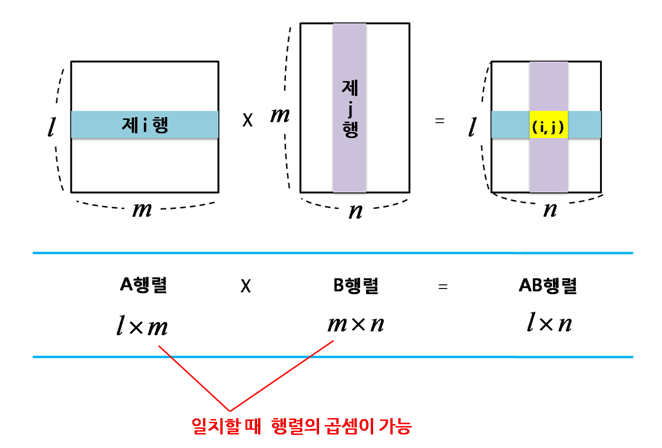

위에 껄 hidden layer를 한번 더!! (W1,W2,W3,b1,b2,b3)


In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
import tensorflow as tf
import numpy as np
import time
# test데이터는 10000개
#train_img, train_lbl = mnist.train.next_batch(mnist.train.num_examples)
#print(train_img.shape, train_lbl.shape)
#test_img, test_lbl = mnist.test.next_batch(mnist.test.num_examples)  (=mnist.test.images)
#print(test_img.shape, test_lbl.shape)
X = tf.placeholder(tf.float32, shape=[None,784])
Y = tf.placeholder(tf.float32, shape=[None,10])
W1 = tf.Variable(tf.random_normal([784,1000])) #1000, input보다 1000이 많이 작으면 데이터가 압축되버림, 적어도 input size랑 같게
b1 = tf.Variable(tf.random_normal([1000]))  #1000
W2 = tf.Variable(tf.random_normal([1000,2000]))  #1000 요 1000만 맞춰주면됨, 어떤 값이여도 결과가 결국 10
b2 = tf.Variable(tf.random_normal([2000]))
W3 = tf.Variable(tf.random_normal([2000,10]))  #1000 요 1000만 맞춰주면됨, 어떤 값이여도 결과가 결국 10
b3 = tf.Variable(tf.random_normal([10]))
batch_size = 128  # 데이터 55000개, 100*5000개가 55000보다 많더라도 앞으로 돌아가면서 다시 수행, 조건은 충분히 cost가 의미있게 낮아지면 다시 쓰는게 의미가 있음, 종류의 데이터 분포가 좋아야함. 데이터가 많아야한다. 바이어스?
num_steps = 5000  #train 데이터를 10번 돌리게됨
# model, cost, train
L1 = tf.sigmoid(tf.matmul(X,W1)+b1) #직선을 유연하게 하기위해 sigmoid함수
L2 = tf.sigmoid(tf.matmul(L1,W2)+b2)
model_LC = tf.matmul(L2, W3)+b3
model = tf.nn.softmax(model_LC)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model_LC, labels=Y))  #reduce_mean은 원소합의 평균
#train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
train = tf.train.AdamOptimizer(0.01).minimize(cost)   # cost가 안좋아서 ADAM 옵티마이저로 변경

acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1)), tf.float32))  ## 같으면 1(True)

## Session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #Training
    t1 = time.time()
    for step in range(1,num_steps+1):
        train_img, train_lbl = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, train], feed_dict={X: train_img, Y: train_lbl})
        if step % 500 == 0:
            print(step, c)
    t2 = time.time()
    print("Training Time:", t2 - t1)
    # Testing
    print(sess.run(acc, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

# cost가 안좋으면, num_steps도 늘려보고, optimizer도 변경해봄


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
500 0.62634426
1000 0.32184866
1500 0.19428086
2000 0.5276572
2500 0.38435027
3000 0.3122325
3500 0.30585822
4000 0.47819817
4500 0.41306618
5000 0.28263673
Training Time: 617.7763769626617
0.9297


tf.layers.dense를 이용해서..

In [0]:
]]
# test데이터는 10000개
#train_img, train_lbl = mnist.train.next_batch(mnist.train.num_examples)
#print(train_img.shape, train_lbl.shape)
#test_img, test_lbl = mnist.test.next_batch(mnist.test.num_examples)  (=mnist.test.images)
#print(test_img.shape, test_lbl.shape)
X = tf.placeholder(tf.float32, shape=[None,784])
Y = tf.placeholder(tf.float32, shape=[None,10])
W1 = tf.Variable(tf.random_normal([784,1000])) #1000, input보다 1000이 많이 작으면 데이터가 압축되버림, 적어도 input size랑 같게
b1 = tf.Variable(tf.random_normal([1000]))  #1000
W2 = tf.Variable(tf.random_normal([1000,2000]))  #1000 요 1000만 맞춰주면됨, 어떤 값이여도 결과가 결국 10
b2 = tf.Variable(tf.random_normal([2000]))
W3 = tf.Variable(tf.random_normal([2000,10]))  #1000 요 1000만 맞춰주면됨, 어떤 값이여도 결과가 결국 10
b3 = tf.Variable(tf.random_normal([10]))
batch_size = 128  # 데이터 55000개, 100*5000개가 55000보다 많더라도 앞으로 돌아가면서 다시 수행, 조건은 충분히 cost가 의미있게 낮아지면 다시 쓰는게 의미가 있음, 종류의 데이터 분포가 좋아야함. 데이터가 많아야한다. 바이어스?
num_steps = 5000  #train 데이터를 10번 돌리게됨
# model, cost, train
#L1 = tf.sigmoid(tf.matmul(X,W1)+b1) #직선을 유연하게 하기위해 sigmoid함수
L1 = tf.layers.dense(inputs=X, units=256, activation=tf.sigmoid)
#L2 = tf.sigmoid(tf.matmul(L1,W2)+b2)
L2 = tf.layers.dense(inputs=L1, units=256, activation=tf.sigmoid)

#model_LC = tf.matmul(L2, W3)+b3
model_LC = tf.layers.dense(inputs =L2, units=10, activation=None)
model = tf.nn.softmax(model_LC)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model_LC, labels=Y))  #reduce_mean은 원소합의 평균
#train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
train = tf.train.AdamOptimizer(0.01).minimize(cost)   # cost가 안좋아서 ADAM 옵티마이저로 변경

acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1)), tf.float32))  ## 같으면 1(True)

## Session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #Training
    t1 = time.time()
    for step in range(1,num_steps+1):
        train_img, train_lbl = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, train], feed_dict={X: train_img, Y: train_lbl})
        if step % 500 == 0:
            print(step, c)
    t2 = time.time()
    print("Training Time:", t2 - t1)
    # Testing
    print(sess.run(acc, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

# cost가 안좋으면, num_steps도 늘려보고, optimizer도 변경해봄


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
500 0.144732
1000 0.04880227
1500 0.022097327
2000 0.043679606
2500 0.0065041156
3000 0.064777106
3500 0.018287657
4000 0.032673955
4500 0.046502545
5000 0.063523516
Training Time: 61.405245304107666
0.9721


Game Theory 셤문제 (p146)


In [0]:
Game Theory 셤문제